# Land uUse/Land Cover (LULC) classification with Deep Learning

This a mini-project to classify 9 Land use classes using transfer learning in Convolutional Neural Networks (CNN). The  Dataset used in this project is published with the original paper tittled: __EuroSAT: A Novel Dataset and Deep Learning Benchmark for Land Use and Land Cover Classification__. 





In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.plots import *

import rasterio
from rasterio import plot
import matplotlib.pyplot as plt

In [3]:
PATH = Path('/home/shakur/GeoProjects/EuroSat/Bands/')
train_path = PATH/'train'
classes = [str(f).split('/')[-1] for f in list(train_path.iterdir())]

## Visualization

#### Classes and Size

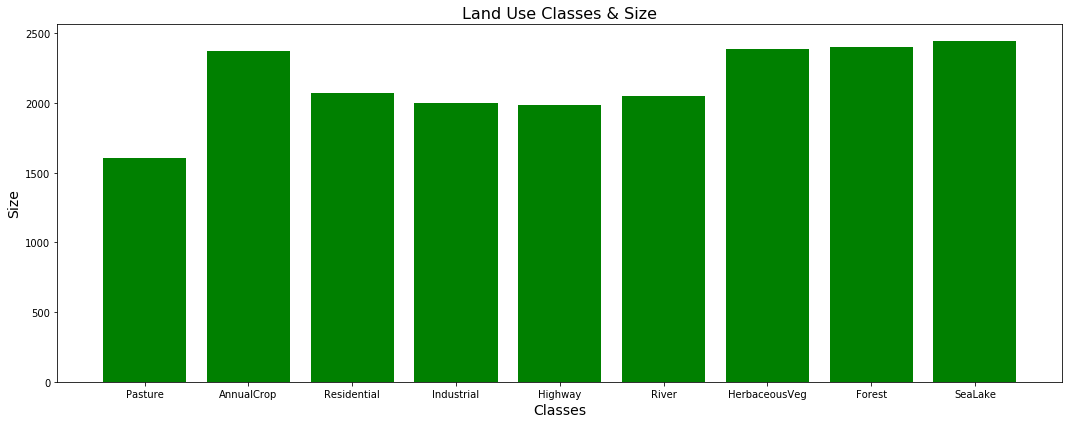

In [4]:
files = []

for i in classes:
    paths =train_path/i
    files.append(list(paths.iterdir())[0])
classes_num = {}
for i in classes:
   
    folders = train_path/i
    classes_num[i] = len(list(folders.iterdir()))
    #print(f'{i} class has {len(list(folders.iterdir()))}')
plt.figure(figsize=(15,6))
plt.bar(classes_num.keys(), classes_num.values(), color='green')
plt.title('Land Use Classes & Size', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Size', fontsize=14)
plt.tight_layout()
plt.savefig('classes.jpg')

#### Images

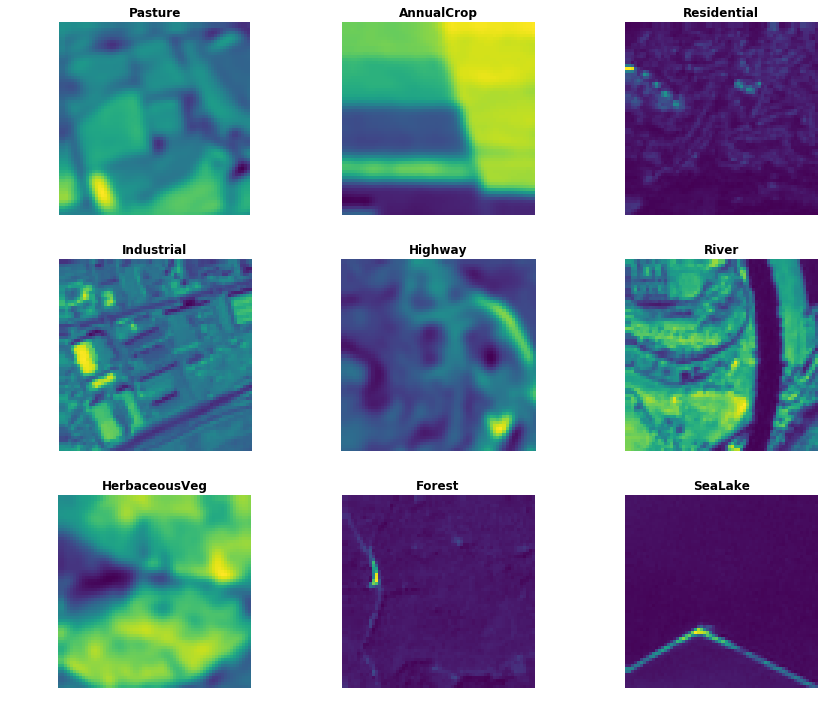

In [5]:
fig = plt.figure(figsize=(12,10))
ax1 = plt.subplot(331);plt.axis('off');plot.show((rasterio.open(files[0])), ax=ax1, title=classes[0])
ax2 = plt.subplot(332);plt.axis('off');plot.show((rasterio.open(files[1])), ax=ax2, title=classes[1])
ax3 = plt.subplot(333);plt.axis('off');plot.show((rasterio.open(files[2])), ax=ax3, title=classes[2])

ax1 = plt.subplot(334);plt.axis('off');plot.show((rasterio.open(files[3])), ax=ax1, title=classes[3])
ax2 = plt.subplot(335);plt.axis('off');plot.show((rasterio.open(files[4])), ax=ax2, title=classes[4])
ax3 = plt.subplot(336);plt.axis('off');plot.show((rasterio.open(files[5])), ax=ax3, title=classes[5])

ax1 = plt.subplot(337);plt.axis('off');plot.show((rasterio.open(files[6])), ax=ax1, title=classes[6])
ax2 = plt.subplot(338);plt.axis('off');plot.show((rasterio.open(files[7])), ax=ax2, title=classes[7])
ax3 = plt.subplot(339);plt.axis('off');plot.show((rasterio.open(files[8])), ax=ax3, title=classes[8])

plt.tight_layout()

## Model

In [6]:
sz = 224
arch=resnet50
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

In [7]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [8]:
learn.fit(0.001, 2)

epoch      trn_loss   val_loss   accuracy   
    0      0.578812   0.442461   0.829884  
    1      0.457605   0.380097   0.854305  



[array([0.3801]), 0.8543046357615894]

In [9]:
lrf=learn.lr_find(start_lr=1e-5, end_lr=1e-1)

epoch      trn_loss   val_loss   accuracy   
    0      0.534863   0.546232   0.811258  



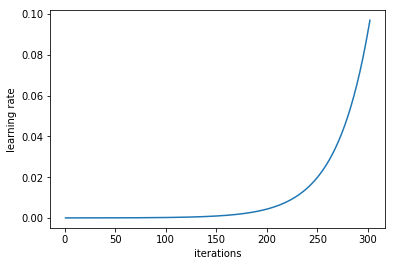

In [10]:
learn.sched.plot_lr()

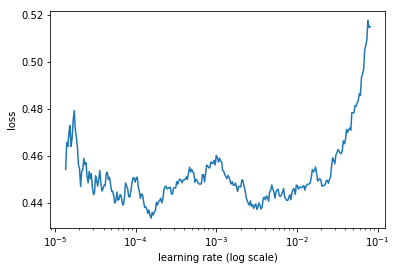

In [11]:
learn.sched.plot()

In [12]:
learn.fit(1e-5, 3, cycle_len=1)


epoch      trn_loss   val_loss   accuracy   
    0      0.449063   0.382895   0.854512  
    1      0.439411   0.3829     0.858444  
    2      0.439615   0.383839   0.860306  



[array([0.38384]), 0.8603062913907285]

In [13]:
learn.fit(1e-5, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.438659   0.382229   0.855546  
    1      0.464093   0.378872   0.854719  
    2      0.452764   0.379811   0.859478  
    3      0.452224   0.377695   0.858237  
    4      0.461952   0.378622   0.855753  
    5      0.455729   0.376258   0.857616  
    6      0.440645   0.37956    0.859892  



[array([0.37956]), 0.8598923841059603]

In [14]:
learn.precompute = False 
learn.fit(1e-5, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.44594    0.37861    0.86072   
    1      0.453791   0.376386   0.854305  
    2      0.448977   0.377814   0.856374  
    3      0.455775   0.377118   0.857202  
    4      0.45333    0.378182   0.860927  
    5      0.436842   0.376677   0.856788  
    6      0.446931   0.376362   0.858444  



[array([0.37636]), 0.8584437086092715]

In [34]:
lr = 1e-4
lrs = np.array([lr/12,lr/6,lr])
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2) 

epoch      trn_loss   val_loss   accuracy   
    0      0.136461   0.159607   0.938121  
    1      0.142121   0.154826   0.942053  
    2      0.130648   0.156664   0.942053  



[array([0.15666]), 0.9420529801324503]

In [35]:
learn.unfreeze()

In [36]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2) 

epoch      trn_loss   val_loss   accuracy   
    0      0.121589   0.154653   0.943709  
    1      0.12335    0.151318   0.94495   
    2      0.119964   0.150949   0.944743  
    3      0.127932   0.151587   0.943295  
    4      0.122281   0.15094    0.94226   
    5      0.115985   0.151082   0.942881  
    6      0.112926   0.151164   0.942881  



[array([0.15116]), 0.9428807947019867]

In [43]:
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2) 

epoch      trn_loss   val_loss   accuracy   
    0      0.104489   0.150221   0.944123  
    1      0.107536   0.150771   0.943502  
    2      0.114207   0.149502   0.943709  



[array([0.1495]), 0.9437086092715232]

## Analyzing results & Visualization

In [38]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [39]:
log_preds = learn.predict()
preds = np.argmax(log_preds, axis=1)
preds

array([0, 0, 0, ..., 8, 8, 8])

In [21]:
data.val_ds.fnames[0]

'valid/AnnualCrop/AnnualCrop_1232.jpg'

### Invidual Predictions

In [22]:
classes_dict = dict(enumerate(data.classes))
classes_dict

{0: 'AnnualCrop',
 1: 'Forest',
 2: 'HerbaceousVeg',
 3: 'Highway',
 4: 'Industrial',
 5: 'Pasture',
 6: 'Residential',
 7: 'River',
 8: 'SeaLake'}

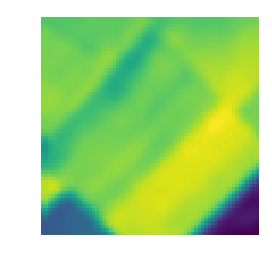

In [23]:
fn = data.val_ds.fnames[0]
pic1 = rasterio.open(str(PATH/fn))
plt.axis('off')
plot.show(pic1)

In [24]:
trn_tfms, val_tfms = tfms_from_model(arch, sz)
ds = FilesIndexArrayDataset([fn], np.array([0]), val_tfms, PATH)
dl = DataLoader(ds)
preds = learn.predict_dl(dl)
print(classes_dict[np.argmax(preds)] == 'AnnualCrop')
np.argmax(preds), classes_dict[np.argmax(preds)]

True


(0, 'AnnualCrop')

In [25]:
data.val_ds.fnames[2900]

'valid/Pasture/Pasture_975.jpg'

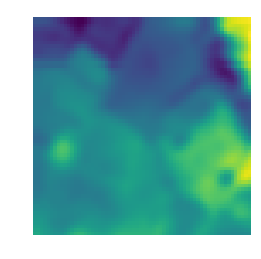

In [26]:
fn = data.val_ds.fnames[2900]
pic2 = rasterio.open(str(PATH/fn))
plt.axis('off')
plot.show(pic2)

In [27]:
trn_tfms, val_tfms = tfms_from_model(arch, sz)
ds = FilesIndexArrayDataset([fn], np.array([2900]), val_tfms, PATH)
dl = DataLoader(ds)
preds = learn.predict_dl(dl)
print(classes_dict[np.argmax(preds)] == 'Pasture')
np.argmax(preds), classes_dict[np.argmax(preds)]

True


(5, 'Pasture')

### Confusion Matrix

In [40]:
multi_preds = learn.predict()
preds = np.argmax(multi_preds, axis=1)
preds

array([0, 0, 0, ..., 8, 8, 8])

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[596   0  12   6   0  11   0   0   0]
 [  0 548   0   0   0   0   0   0  50]
 [  4   0 558  21   0  28   0   0   0]
 [  8   0   9 484   0   9   0   0   2]
 [  0   0   0   0 497   0   0   0   0]
 [ 12   0  44   4   0 337   0   0   0]
 [  0   0   0   0   1   0 586   0   0]
 [  1   0   0   1   0   0   0 445   1]
 [  1  41   0   3   0   2   0   3 507]]


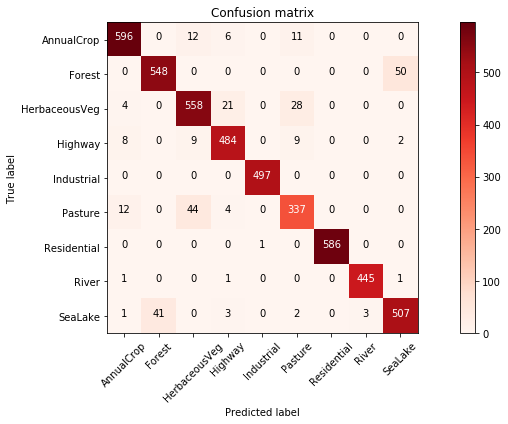

In [42]:
plot_confusion_matrix(cm, data.classes, cmap='Reds',figsize=(12,6))
plt.tight_layout()